<a href="https://colab.research.google.com/github/amin-khorram/MNIST-Classification/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape
x_valid.shape

(10000, 28, 28)

In [4]:
x_train.dtype
x_train.min()
x_train.max()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

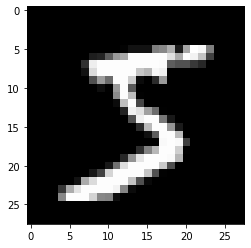

In [5]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')


In [6]:
y_train[0]

5

In [7]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [8]:
x_train.shape
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [10]:
x_train.dtype
x_train.min()
x_train.max()

1.0

In [11]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [12]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from tensorflow.keras.models import Sequential

model = Sequential()
from tensorflow.keras.layers import Dense
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1879 - accuracy: 0.9444 - val_loss: 0.1314 - val_accuracy: 0.9630
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0981 - accuracy: 0.9752 - val_loss: 0.1045 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [===

In [33]:
!git init
!git config — global user.email “akw126@uregina.ca”
!git config — global user.name “amin-khorram”


Reinitialized existing Git repository in /content/MNIST-Classification/MNIST-Classification/.git/
usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-n

In [39]:
!git config --global init.defaultBranch main

In [35]:
!git commit -m “first commit”

error: pathspec 'commit”' did not match any file(s) known to git.


In [37]:
!git remote add origin https://<amin-khorram>:<Passenger153368>@github.com/<amin-khorram>/MNIST-Classification.git

/bin/bash: amin-khorram: No such file or directory


In [32]:
!git clone https://github.com/amin-khorram/MNIST-Classification.git

fatal: destination path 'MNIST-Classification' already exists and is not an empty directory.
